# *Importing dataset and visualizing the first few rows of data*
The first step in our EDA is to view what the data might look like. The first 10 rows of data shows us that already there are missing data for 'Education Level' and Credit default'.

In [67]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import requests
import os
import pandas as pd

DB_PATH = 'data/bmarket.db'

def get_connection():
    return sqlite3.connect(DB_PATH)

def fetch_data():
    conn = get_connection()
    query = "SELECT name FROM sqlite_master WHERE type='table';"
    table_name = pd.read_sql(query, conn).iloc[0, 0]
    df = pd.read_sql(f"SELECT * FROM {table_name};", conn)
    conn.close()
    return df

df = fetch_data()
df.head(10)

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no
5,17202,58 years,retired,married,professional.course,no,None,yes,Cell,1,999,no
6,880,48 years,services,married,high.school,unknown,yes,no,Telephone,1,999,no
7,23758,150 years,admin.,divorced,university.degree,unknown,yes,None,Cell,7,999,no
8,10822,24 years,entrepreneur,married,university.degree,no,None,None,telephone,4,999,no
9,14356,36 years,technician,divorced,professional.course,no,yes,yes,Cell,4,999,no


An overview of the raw dataset shows us statistics for the numerical data. We can see that only 3 features are numerical. However previously we can see that age is in string type when it should be more appropriate to be in float type. 

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           16399 non-null  object
 7   Personal Loan          37042 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


# *Plotting charts and heatmaps*
##### Next we want to plot histograms for all the numerical data and bar plots for all categorical data. before doing so we 
1. change the age to float type, and 
2. we view the unique values for each of the categorical features in order to make sure that the labelling is consistent.

In [69]:
# Strip 'years' and spaces from the 'Age' column and convert to numeric
df['Age'] = df['Age'].str.replace('years', '').str.strip()
df['Age'] = pd.to_numeric(df['Age'])
# Display all unique labels if feature type is not numerical
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].unique()}")

df.describe()

Unique values in Occupation: ['technician' 'unknown' 'blue-collar' 'admin.' 'housemaid' 'retired'
 'services' 'entrepreneur' 'unemployed' 'management' 'self-employed'
 'student']
Unique values in Marital Status: ['married' 'divorced' 'single' 'unknown']
Unique values in Education Level: ['high.school' 'unknown' 'basic.9y' 'professional.course'
 'university.degree' 'basic.4y' 'basic.6y' 'illiterate']
Unique values in Credit Default: ['no' 'unknown' 'yes']
Unique values in Housing Loan: ['no' 'yes' None 'unknown']
Unique values in Personal Loan: ['yes' 'no' None 'unknown']
Unique values in Contact Method: ['Cell' 'telephone' 'cellular' 'Telephone']
Unique values in Subscription Status: ['no' 'yes']


,Client ID,Age,Campaign Calls,Previous Contact Days
count,41188.00000,41188.000000,41188.000000,41188.000000
mean,20594.50000,51.231572,2.051374,962.475454
std,11890.09578,34.708486,3.171345,186.910907
min,1.00000,17.000000,-41.000000,0.000000
25%,10297.75000,33.000000,1.000000,999.000000
50%,20594.50000,40.000000,2.000000,999.000000
75%,30891.25000,51.000000,3.000000,999.000000
max,41188.00000,150.000000,56.000000,999.000000


From the above unique values we see that there are no duplicate labels involved (for example existence of 'married' and 'MarRieD' in the 'Marital Status' feature). We can then proceed to plot our histograms and bar plots

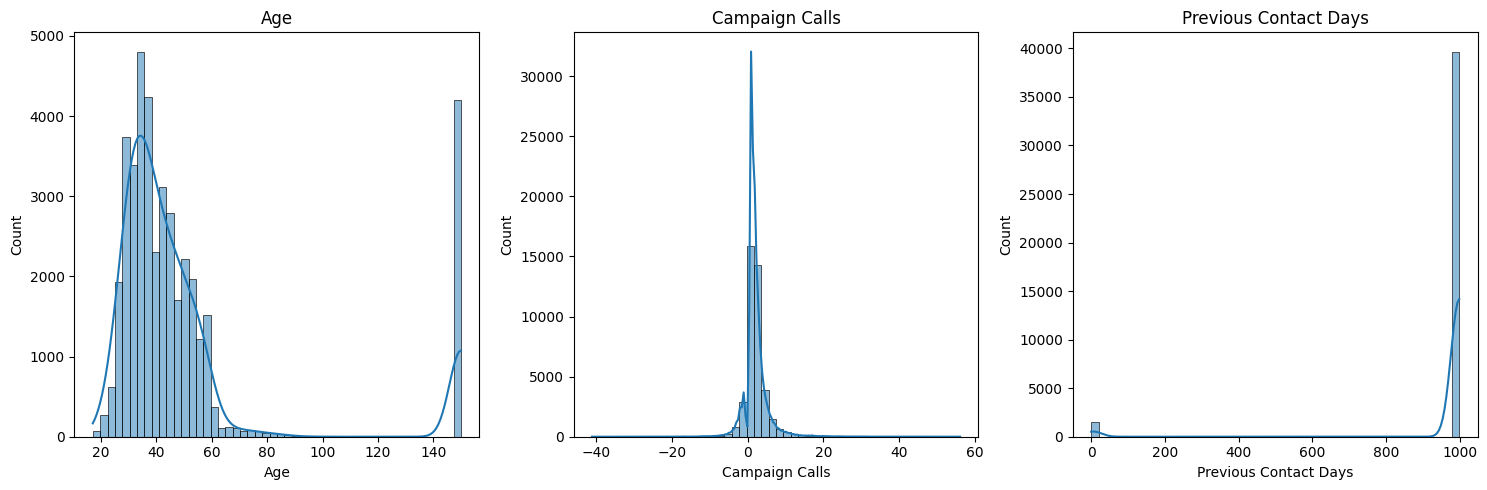

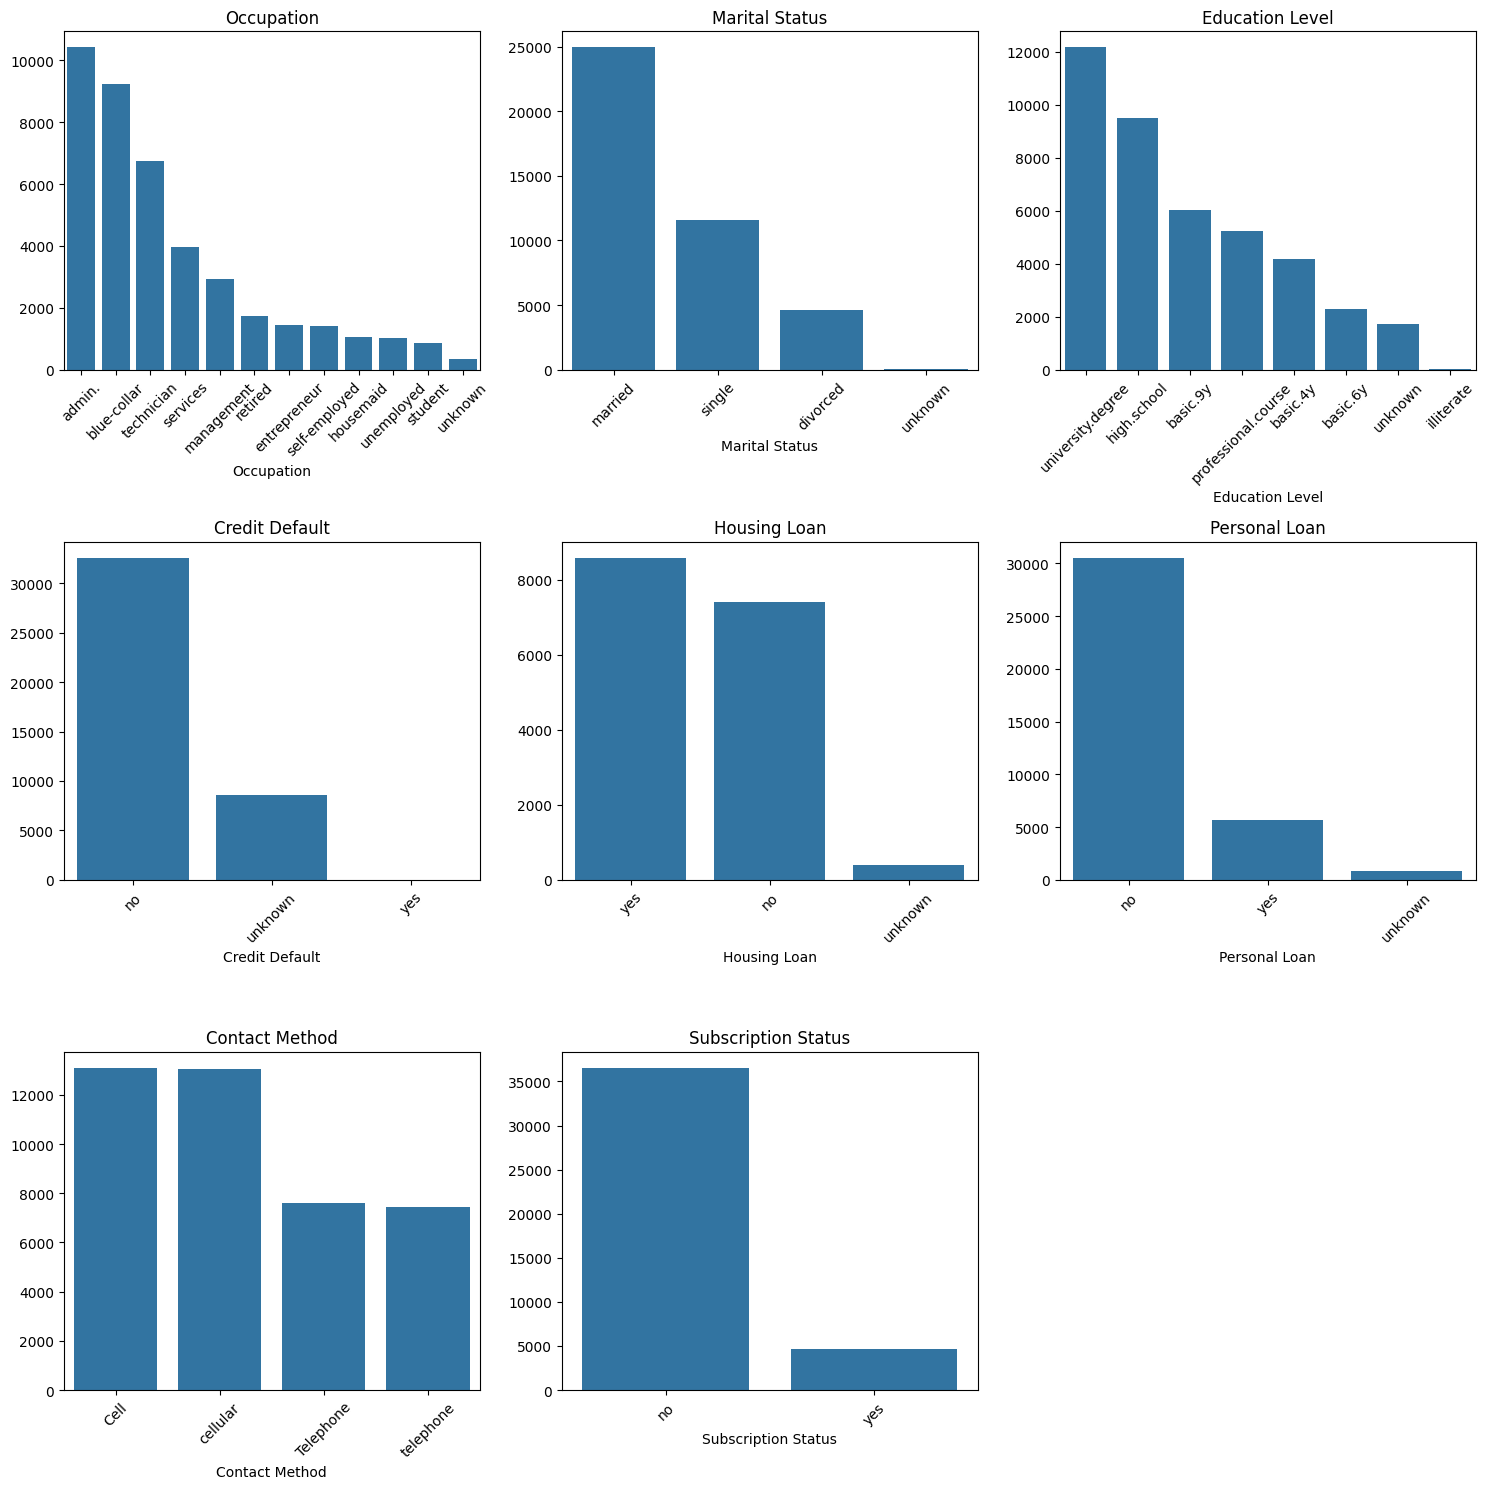

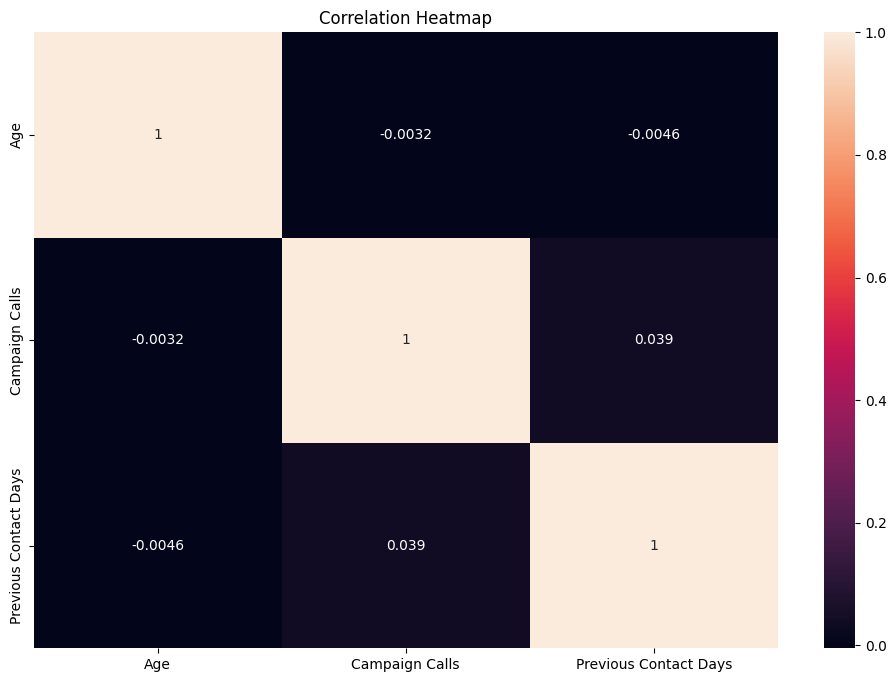

In [70]:
df_num = df.select_dtypes(include=['number'])
df_num = df_num.drop(columns=['Client ID', 'index'], errors='ignore') #Remove 'Client ID' and 'index' columns from numeric columns
df_cat = df.select_dtypes(exclude=['number'])
# Plot histograms for numeric columns
num_cols = [col for col in df_num.columns if col != 'index']
num_rows = (len(num_cols) + 2) // 3  # Calculate rows for a 3-column grid
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    sns.histplot(df_num[col], bins=50, kde=True, ax=axes[idx])
    axes[idx].set_title(col)
for idx in range(len(num_cols), len(axes)):
    fig.delaxes(axes[idx])  # Remove unused subplots
plt.tight_layout()
plt.show()

# Plot bar plots for categorical columns
cat_cols = df_cat.columns
num_rows = (len(cat_cols) + 2) // 3  # Calculate rows for a 3-column grid
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for idx, col in enumerate(cat_cols):
    sns.barplot(x=df_cat[col].value_counts().index, y=df_cat[col].value_counts().values, ax=axes[idx])
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_title(col)
    
for idx in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[idx])  # Remove unused subplots
plt.tight_layout()
plt.show()

# Plot heatmap for numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


# *Analyzing Numerical features*
## 1. **Age**
- Firstly we note that there are ages more than 140 years. Let us plot the percentage of data whose age is more than 140 years as well as the distribution of ' Subscription status' amongst this anomalous data. We can see that there is a jump from *98 to 150*. 
- 150 is an unrealistic age so let us analyse the distribution of rows with age = 150


Unique values in 'Age' column: [np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72), np.int64(73), np.int64(74), np.int64(75), np.int64(76), np.int64(77), np.int64(78), np.int64(79), np.int64(80), np.int64(81), np.int64(82), np.int64(83), np.int64(84), np.int64(85), np

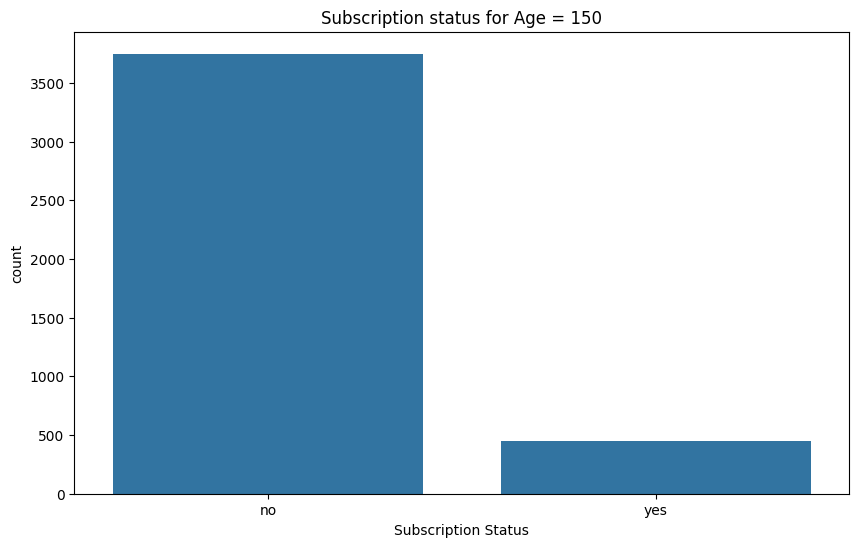

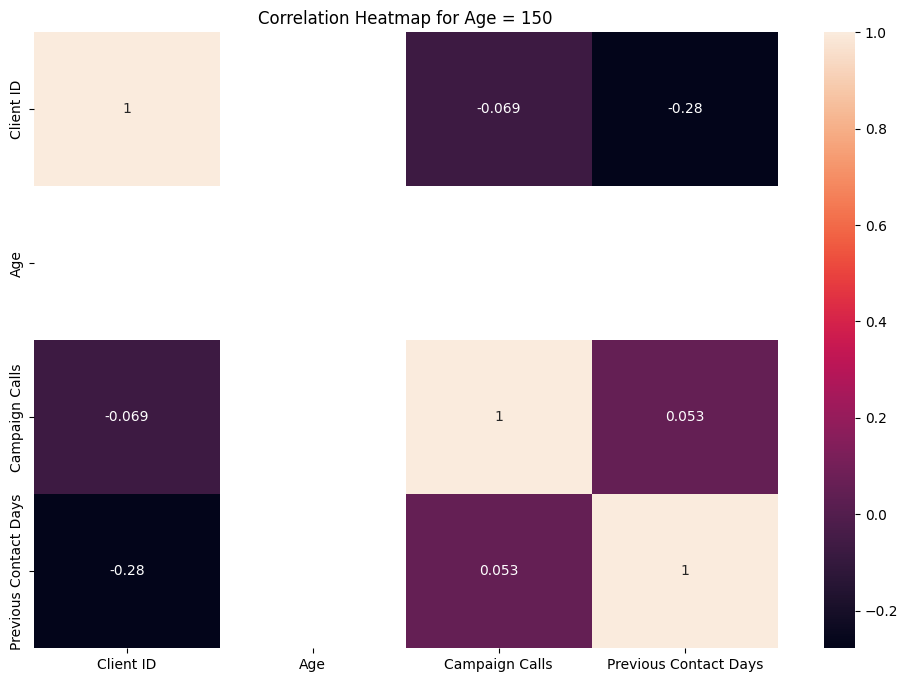

Percentage of rows with Age = 150: 10.19%


In [71]:
# Print the sorted unique values of 'Age' column
print("Unique values in 'Age' column:", sorted(df['Age'].unique()))
# Plot bar chart for 'Subscription status' for rows with 'Age' = 150
df_age_150 = df[df['Age'] == 150]
df_num_age_150 = df_age_150.select_dtypes(include=['number'])
df_num_age_150 = df_num_age_150.drop(columns=['Client ID', 'index', 'Age'], errors='ignore') #Remove 'Client ID' and 'index' columns from numeric columns
df_cat_age_150 = df_age_150.select_dtypes(exclude=['number'])
if not df_age_150.empty:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Subscription Status', data=df_age_150)
    plt.title("Subscription status for Age = 150")
    plt.show()
else:
    print("No rows found with Age = 150")

# Show heat map of numeric data with 'Age' = 150
if not df_age_150.empty:
    df_num_age_150 = df_age_150.select_dtypes(include=['number'])  # Select only numeric columns
    if not df_num_age_150.empty:
        plt.figure(figsize=(12, 8))
        sns.heatmap(df_num_age_150.corr(), annot=True)
        plt.title("Correlation Heatmap for Age = 150")
        plt.show()
    else:
        print("No numeric columns available for correlation heatmap.")

# Show percentage of rows with 'Age' = 150
age_150_percentage = (len(df_age_150) / len(df)) * 100
print(f"Percentage of rows with Age = 150: {age_150_percentage:.2f}%")

- We can see from the above that the heatmap of the rows with Age = 150 look similar to the global heat map. Hence we can choose to remove these rows with Age = 150
- *However* we also see that the rows with Age = 150 makes up a significant portion of the dataset of about 10%. We may choose to impute the rows with Age = 150 using the mean or median imputation method. If the data is skewed, we use the median imputation method. We can use scipys skewness metric to decide what imputation method to use

In [72]:
# Use scipy to determine skewness of the 'Age' column considering the original dataset with 'Age' = 150 dropped
df_copy = df.copy()  # Create a copy of the original DataFrame
df_copy['Age'] = df_copy['Age'].replace(150, np.nan)  # Replace 150 with NaN
from scipy.stats import skew
age_skewness = skew(df_copy['Age'].dropna())
print(f"Skewness of 'Age' column: {age_skewness:.2f}")

Skewness of 'Age' column: 0.79


- The skewness is above 0.5 hence if we decide to replace the rows with Age = 150, we might choose the median imputation
## 2. **Campaign Calls**
- We see from the description of the dataframe that there are negative Campaign Calls. This is not possible. We can view the percentage of negative Campaign Calls and evaluate its distribution.

In [73]:
# Show percentage of dataset with 'Campaign Calls' having a negative value
campaign_calls_negative = df[df['Campaign Calls'] < 0]
campaign_calls_negative_percentage = (len(campaign_calls_negative) / len(df)) * 100
print(f"Percentage of dataset with 'Campaign Calls' < 0: {campaign_calls_negative_percentage:.2f}%")

Percentage of dataset with 'Campaign Calls' < 0: 10.08%


- 10% of the dataset having negative Campaign Calls is significant. We may wish to take the absolute value of Campaign Calls for these rows.
## 3. **Previous Contact Days**
- There seem to be a large separation of values. This means to say contacts were made only close to the campaign dates. For example, no campaign calls were made in the periods between 2 campaigns. We can see how effective Campaigning recently is for Subscription Status. via a grid

In [81]:
# Split the dataset into two subsets
df_less_500 = df[df['Previous Contact Days'] < 500]
df_more_500 = df[df['Previous Contact Days'] > 500]

# Count rows with 'Subscription Status' = 'no' or 'yes' in each subset
count_less_500 = df_less_500['Subscription Status'].value_counts()
count_more_500 = df_more_500['Subscription Status'].value_counts()

# Show the total number of Campaign Calls in the subset and also the percentage of 'no' and 'yes' in the subset
print("Counts for 'Previous Contact Days' < 500:")
print(count_less_500)
# Show percentage of 'no' and 'yes' in the subset
total_count_less_500 = len(df_less_500)
percentage_yes_less_500 = (count_less_500.get('yes', 0) / total_count_less_500) * 100
print(f"Percentage of 'yes' in subset < 500: {percentage_yes_less_500:.2f}%")

print("\nCounts for 'Previous Contact Days' > 500:")
print(count_more_500)
# Show percentage of 'no' and 'yes' in the subset
total_count_more_500 = len(df_more_500)
percentage_yes_more_500 = (count_more_500.get('yes', 0) / total_count_more_500) * 100
print(f"Percentage of 'yes' in subset > 500: {percentage_yes_more_500:.2f}%")

Counts for 'Previous Contact Days' < 500:
Subscription Status
yes    967
no     548
Name: count, dtype: int64
Percentage of 'yes' in subset < 500: 63.83%

Counts for 'Previous Contact Days' > 500:
Subscription Status
no     36000
yes     3673
Name: count, dtype: int64
Percentage of 'yes' in subset > 500: 9.26%


- The percentage of 'yes' amongst clients who experienced Campaigning close to the current date turned out to be 64% compared to clients who did not experience campaigning at a rate of only 9.3%. 
- We can further analyse the clients whose 'Previous Contact Calls' were less than 500 (i.e. campaigned close to the current date) to see if there is any pattern.

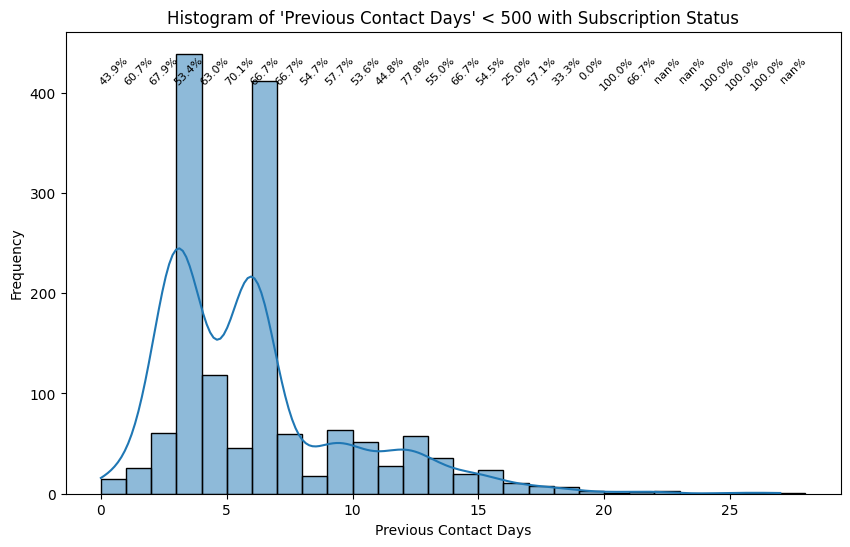

In [92]:
# Superimpose on the graph, the percentage of dataset within each bin whose 'Subscription Status' is 'yes', and add that value on top of the bar
plt.figure(figsize=(10, 6))
sns.histplot(df_less_500['Previous Contact Days'], kde=True, bins=range(int(df_less_500['Previous Contact Days'].min()), int(df_less_500['Previous Contact Days'].max()) + 2))
plt.title("Histogram of 'Previous Contact Days' < 500 with Subscription Status")
plt.xlabel("Previous Contact Days")
plt.ylabel("Frequency")
# Calculate percentage of 'yes' in each bin
bin_counts = df_less_500['Previous Contact Days'].value_counts(bins=range(int(df_less_500['Previous Contact Days'].min()), int(df_less_500['Previous Contact Days'].max()) + 2))    
bin_counts_yes = df_less_500[df_less_500['Subscription Status'] == 'yes']['Previous Contact Days'].value_counts(bins=range(int(df_less_500['Previous Contact Days'].min()), int(df_less_500['Previous Contact Days'].max()) + 2))
bin_counts_yes = bin_counts_yes.reindex(bin_counts.index, fill_value=0)  # Align indices
bin_percentages = (bin_counts_yes / bin_counts) * 100
for bin_edge, percentage in bin_percentages.items():
    plt.text(bin_edge.mid, plt.ylim()[1] * 0.95, f"{percentage:.1f}%", 
             ha='center', va='top', fontsize=8, rotation=45)
plt.show()

- After superimposing the percentage of clients who subcribed for each bin, we see that there is no significant trend between how early the client was contacted and how often then subscried to the term deposit.
# *Analyzing categorical features*
- Let us superimpose the rate of subscription according to each categorical feature. We see that there is no obvious trend.

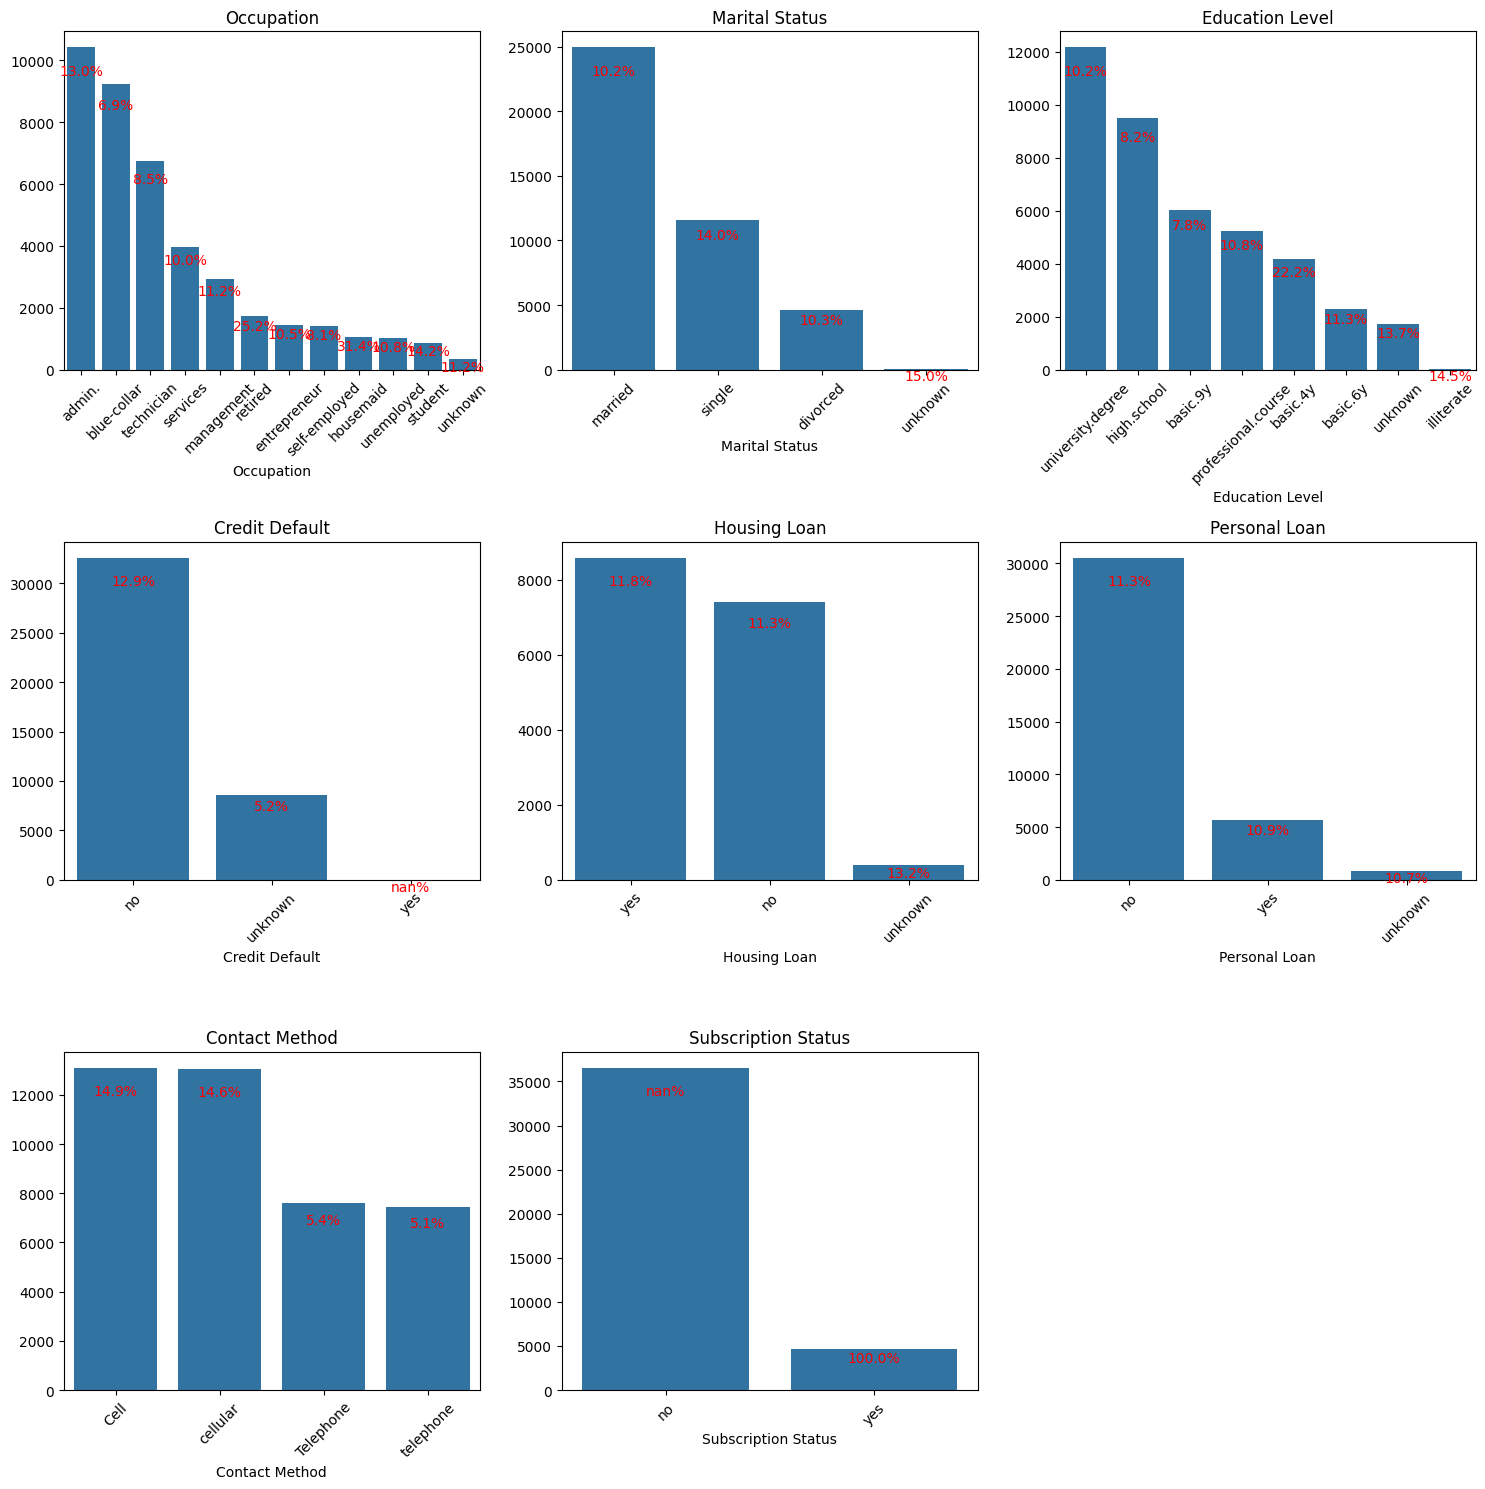

In [95]:
# Create a grid of bar charts for each categorical column
num_rows = (len(cat_cols) + 2) // 3  # Calculate rows for a 3-column grid
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for idx, col in enumerate(cat_cols):
    ax = axes[idx]
    # Calculate counts and percentages
    counts = df_cat[col].value_counts()
    counts_yes = df_cat[df_cat['Subscription Status'] == 'yes'][col].value_counts()
    percentages = (counts_yes / counts) * 100

    # Plot bar chart
    sns.barplot(x=counts.index, y=counts.values, ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

    # Add percentages on top of each bar
    for bar, percentage in zip(ax.patches, percentages):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() * 0.95,
            f"{percentage:.1f}%", ha='center', va='top', fontsize=10, color='red')

# Remove unused subplots
for idx in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

- We further note that for the Contact Method feature, Cell and cellular refer to the same thing, as does Telephone and telephone. 

# 

# *Duplicate Data*
##### Lastly we check if there were any duplicate data. We find that we have about 7500 duplciates out of the original 57000, which is significant.

# *Columnns with NaN values*
##### We also check the columns that have NaN values. We find that Humidity Sensor has the most number of rows with NaN values. We can choose to impute these values using the mode or a constant that we specify in a config_preprocessing file. 

In [ ]:
# Checking for duplicate data in the df dataset
duplicate_rows = df[df.duplicated()]
duplicate_rows_count = df.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {duplicate_rows_count}")
# Group duplicate consecutively and display them:
consecutive_duplicates = df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).reset_index(drop=True)
consecutive_duplicates.head(10)

In [ ]:
# Checking number of rows with NaN values according to the columns
nan_values = df.isna().sum()
nan_values